# Final Project

Team 5: Mathia Quimpo, Matthew Chin

## Data Cleaning and Transformation

In [1]:
# import libraries
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load data
raw_df = pd.read_csv('https://github.com/mchin10/BSAN-6070/blob/main/Final%20Project/evapotranspiration_data.csv?raw=true')
raw_df

,Stn Id,Stn Name,CIMIS Region,Month Year,Total ETo (in),Total Precip (in),Avg Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Max Air Temp (F),Avg Min Air Temp (F),Avg Air Temp (F),Avg Max Rel Hum (%),Avg Min Rel Hum (%),Avg Rel Hum (%),Avg Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F)
0,2,FivePoints,San Joaquin Valley,Jun-82,5.97,0.12,562.0,17.4,89.9,59.4,72.7,85.0,22.0,65.0,59.5,6.2,78.1
1,2,FivePoints,San Joaquin Valley,Jul-82,9.04,0.16,646.0,14.5,96.0,58.8,77.5,77.0,14.0,46.0,54.4,5.4,79.0
2,2,FivePoints,San Joaquin Valley,Aug-82,8.11,0.00,583.0,14.1,95.3,60.9,77.7,81.0,20.0,44.0,53.3,5.5,79.7
3,2,FivePoints,San Joaquin Valley,Sep-82,5.48,1.18,458.0,12.1,86.5,50.2,67.8,91.0,30.0,54.0,49.1,5.0,74.0
4,2,FivePoints,San Joaquin Valley,Oct-82,4.73,0.00,408.0,8.0,85.8,44.7,63.6,80.0,18.0,40.0,38.5,4.5,67.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25329,174,Long Beach,Los Angeles Basin,Jan-24,2.02,2.22,264.0,10.3,66.2,43.4,53.9,88.0,50.0,72.0,44.6,2.5,56.1
25330,174,Long Beach,Los Angeles Basin,Feb-24,2.03,11.42,275.0,11.4,64.1,46.7,55.1,90.0,59.0,77.0,47.8,3.0,58.2
25331,174,Long Beach,Los Angeles Basin,Mar-24,3.65,3.35,424.0,11.5,65.4,46.8,56.1,89.0,55.0,75.0,48.0,3.4,61.4
25332,174,Long Beach,Los Angeles Basin,Apr-24,4.54,0.48,522.0,11.9,68.3,48.0,58.0,89.0,53.0,72.0,48.9,3.4,64.3


In [3]:
# get information
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25334 entries, 0 to 25333
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Stn Id                25334 non-null  object 
 1   Stn Name              25333 non-null  object 
 2   CIMIS Region          25333 non-null  object 
 3   Month Year            25333 non-null  object 
 4   Total ETo (in)        24588 non-null  float64
 5   Total Precip (in)     25159 non-null  float64
 6   Avg Sol Rad (Ly/day)  25245 non-null  float64
 7   Avg Vap Pres (mBars)  25238 non-null  float64
 8   Avg Max Air Temp (F)  25244 non-null  float64
 9   Avg Min Air Temp (F)  25241 non-null  float64
 10  Avg Air Temp (F)      25243 non-null  float64
 11  Avg Max Rel Hum (%)   25248 non-null  float64
 12  Avg Min Rel Hum (%)   25248 non-null  float64
 13  Avg Rel Hum (%)       25228 non-null  float64
 14  Avg Dew Point (F)     25227 non-null  float64
 15  Avg Wind Speed (mph

In [4]:
# find null values
raw_df.isnull().sum()

Stn Id                    0
Stn Name                  1
CIMIS Region              1
Month Year                1
Total ETo (in)          746
Total Precip (in)       175
Avg Sol Rad (Ly/day)     89
Avg Vap Pres (mBars)     96
Avg Max Air Temp (F)     90
Avg Min Air Temp (F)     93
Avg Air Temp (F)         91
Avg Max Rel Hum (%)      86
Avg Min Rel Hum (%)      86
Avg Rel Hum (%)         106
Avg Dew Point (F)       107
Avg Wind Speed (mph)     94
Avg Soil Temp (F)       319
dtype: int64

In [5]:
# drop null values for target variable
raw_df.dropna(subset="Total ETo (in)", inplace=True)

In [6]:
# drop rows that have a high number of missing values
raw_df.dropna(thresh=13, inplace=True)

In [7]:
# impute other variables with mean
cols_to_impute = ['Total Precip (in)', 'Avg Sol Rad (Ly/day)', 'Avg Vap Pres (mBars)',
                  'Avg Max Air Temp (F)', 'Avg Min Air Temp (F)', 'Avg Air Temp (F)',
                  'Avg Max Rel Hum (%)', 'Avg Min Rel Hum (%)', 'Avg Rel Hum (%)', 
                  'Avg Dew Point (F)','Avg Soil Temp (F)'
                 ] 
                  

imputer = SimpleImputer(strategy='mean')

# Fit and transform the selected columns
imputed_data = imputer.fit_transform(raw_df[cols_to_impute])

# Replace the imputed values back into the DataFrame
raw_df.loc[:, cols_to_impute] = imputed_data

In [8]:
# check null values again
raw_df.isnull().sum()

Stn Id                  0
Stn Name                0
CIMIS Region            0
Month Year              0
Total ETo (in)          0
Total Precip (in)       0
Avg Sol Rad (Ly/day)    0
Avg Vap Pres (mBars)    0
Avg Max Air Temp (F)    0
Avg Min Air Temp (F)    0
Avg Air Temp (F)        0
Avg Max Rel Hum (%)     0
Avg Min Rel Hum (%)     0
Avg Rel Hum (%)         0
Avg Dew Point (F)       0
Avg Wind Speed (mph)    0
Avg Soil Temp (F)       0
dtype: int64

In [9]:
# check for duplicates
raw_df.duplicated().sum()

0

In [10]:
# drop unused columns
raw_df.drop(columns=['Stn Id', 'Stn Name', 
                     'Month Year', 'Avg Max Air Temp (F)', 
                     'Avg Min Air Temp (F)','Avg Max Rel Hum (%)', 
                     'Avg Min Rel Hum (%)',], inplace=True)

In [11]:
# one-hot encode CIMIS region
oh_encoder = OneHotEncoder()
oe_encoded_countries = oh_encoder.fit_transform(raw_df[["CIMIS Region"]])
# Get the feature names after one-hot encoding
encoded_columns = oh_encoder.get_feature_names_out(["CIMIS Region"])
# Create a DataFrame with the encoded data and updated column labels
ohe_df = pd.DataFrame(oe_encoded_countries.toarray(), columns=encoded_columns)
ohe_df

,CIMIS Region_Bishop,CIMIS Region_Central Coast Valleys,CIMIS Region_Imperial/Coachella Valley,CIMIS Region_Los Angeles Basin,CIMIS Region_Monterey Bay,CIMIS Region_North Coast Valleys,CIMIS Region_Northeast Plateau,CIMIS Region_Sacramento Valley,CIMIS Region_San Bernardino,CIMIS Region_San Francisco Bay,CIMIS Region_San Joaquin Valley,CIMIS Region_Sierra Foothill,CIMIS Region_South Coast Valleys
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24491,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24492,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24493,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24494,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# drop CIMIS Region after encoding
raw_df.drop(columns='CIMIS Region', inplace=True)

In [13]:
# merge dataframes horizontally
df = pd.concat([raw_df, ohe_df], axis=1)
df.columns = ["".join(col) for col in df.columns]
df.dropna(inplace=True)
df

,Total ETo (in),Total Precip (in),Avg Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Avg Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F),CIMIS Region_Bishop,...,CIMIS Region_Los Angeles Basin,CIMIS Region_Monterey Bay,CIMIS Region_North Coast Valleys,CIMIS Region_Northeast Plateau,CIMIS Region_Sacramento Valley,CIMIS Region_San Bernardino,CIMIS Region_San Francisco Bay,CIMIS Region_San Joaquin Valley,CIMIS Region_Sierra Foothill,CIMIS Region_South Coast Valleys
0,5.97,0.12,562.0,17.4,72.7,65.0,59.5,6.2,78.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.04,0.16,646.0,14.5,77.5,46.0,54.4,5.4,79.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.11,0.00,583.0,14.1,77.7,44.0,53.3,5.5,79.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.48,1.18,458.0,12.1,67.8,54.0,49.1,5.0,74.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.73,0.00,408.0,8.0,63.6,40.0,38.5,4.5,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24491,6.80,0.13,655.0,12.4,63.3,64.0,51.2,4.4,67.4,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24492,6.84,0.00,710.0,13.1,63.7,67.0,51.7,4.6,72.5,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24493,6.28,0.00,622.0,14.4,63.2,73.0,54.3,5.0,73.2,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24494,5.36,0.00,587.0,15.0,63.1,76.0,55.4,4.7,72.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [14]:
df.head()

,Total ETo (in),Total Precip (in),Avg Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Avg Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F),CIMIS Region_Bishop,...,CIMIS Region_Los Angeles Basin,CIMIS Region_Monterey Bay,CIMIS Region_North Coast Valleys,CIMIS Region_Northeast Plateau,CIMIS Region_Sacramento Valley,CIMIS Region_San Bernardino,CIMIS Region_San Francisco Bay,CIMIS Region_San Joaquin Valley,CIMIS Region_Sierra Foothill,CIMIS Region_South Coast Valleys
0,5.97,0.12,562.0,17.4,72.7,65.0,59.5,6.2,78.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,9.04,0.16,646.0,14.5,77.5,46.0,54.4,5.4,79.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,8.11,0.00,583.0,14.1,77.7,44.0,53.3,5.5,79.7,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5.48,1.18,458.0,12.1,67.8,54.0,49.1,5.0,74.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,4.73,0.00,408.0,8.0,63.6,40.0,38.5,4.5,67.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [15]:
df.describe()

,Total ETo (in),Total Precip (in),Avg Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Avg Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F),CIMIS Region_Bishop,...,CIMIS Region_Los Angeles Basin,CIMIS Region_Monterey Bay,CIMIS Region_North Coast Valleys,CIMIS Region_Northeast Plateau,CIMIS Region_Sacramento Valley,CIMIS Region_San Bernardino,CIMIS Region_San Francisco Bay,CIMIS Region_San Joaquin Valley,CIMIS Region_Sierra Foothill,CIMIS Region_South Coast Valleys
count,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,...,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000,23677.000000
mean,4.505099,1.324997,432.444587,34.844238,60.034410,62.869802,45.721911,4.498830,62.443844,0.020568,...,0.074967,0.090214,0.087427,0.055286,0.054061,0.011403,0.061199,0.216159,0.038856,0.085019
std,3.799971,10.751621,182.768542,983.570290,11.466201,15.253194,8.819327,9.619501,10.773244,0.141938,...,0.263344,0.286494,0.282465,0.228542,0.226143,0.106179,0.239699,0.411633,0.193256,0.278916
min,-390.850000,0.000000,-6068.000000,-23325.600000,-64.900000,0.000000,-73.500000,1.000000,-46.800000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.380000,0.000000,276.000000,8.900000,52.100000,52.000000,40.700000,3.400000,54.200000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.410000,0.300000,444.000000,10.700000,59.300000,64.000000,45.898285,4.200000,62.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.390000,1.410000,587.000000,13.300000,67.400000,75.000000,51.700000,5.000000,70.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,35.230000,1378.740000,1329.000000,63218.300000,161.300000,100.000000,75.900000,602.200000,100.200000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Data Exploration

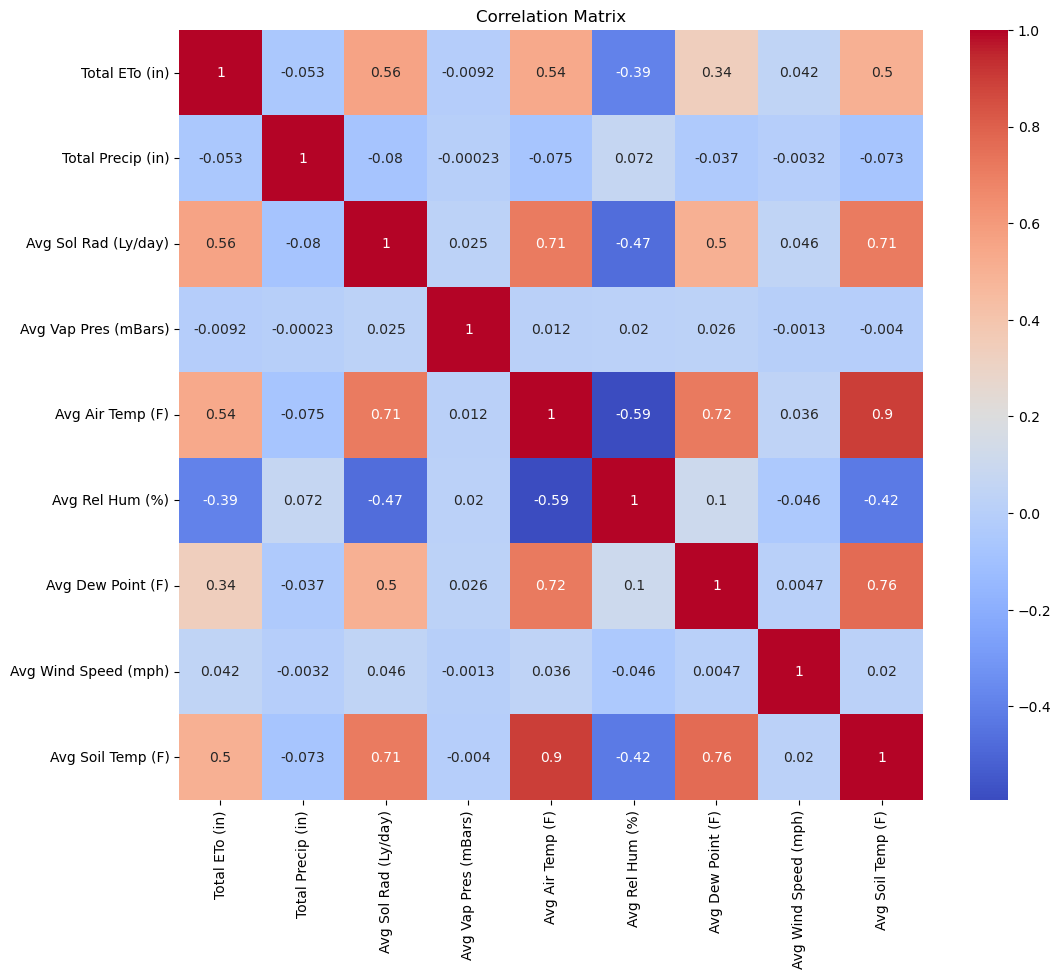

In [16]:
# Compute the correlation matrix for non-country columns
variables = ['Total ETo (in)', 'Total Precip (in)', 
             'Avg Sol Rad (Ly/day)', 'Avg Vap Pres (mBars)', 
             'Avg Air Temp (F)', 'Avg Rel Hum (%)',
             'Avg Dew Point (F)', 'Avg Wind Speed (mph)',
             'Avg Soil Temp (F)']

correlation_matrix = df[variables].corr()

# Generate the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

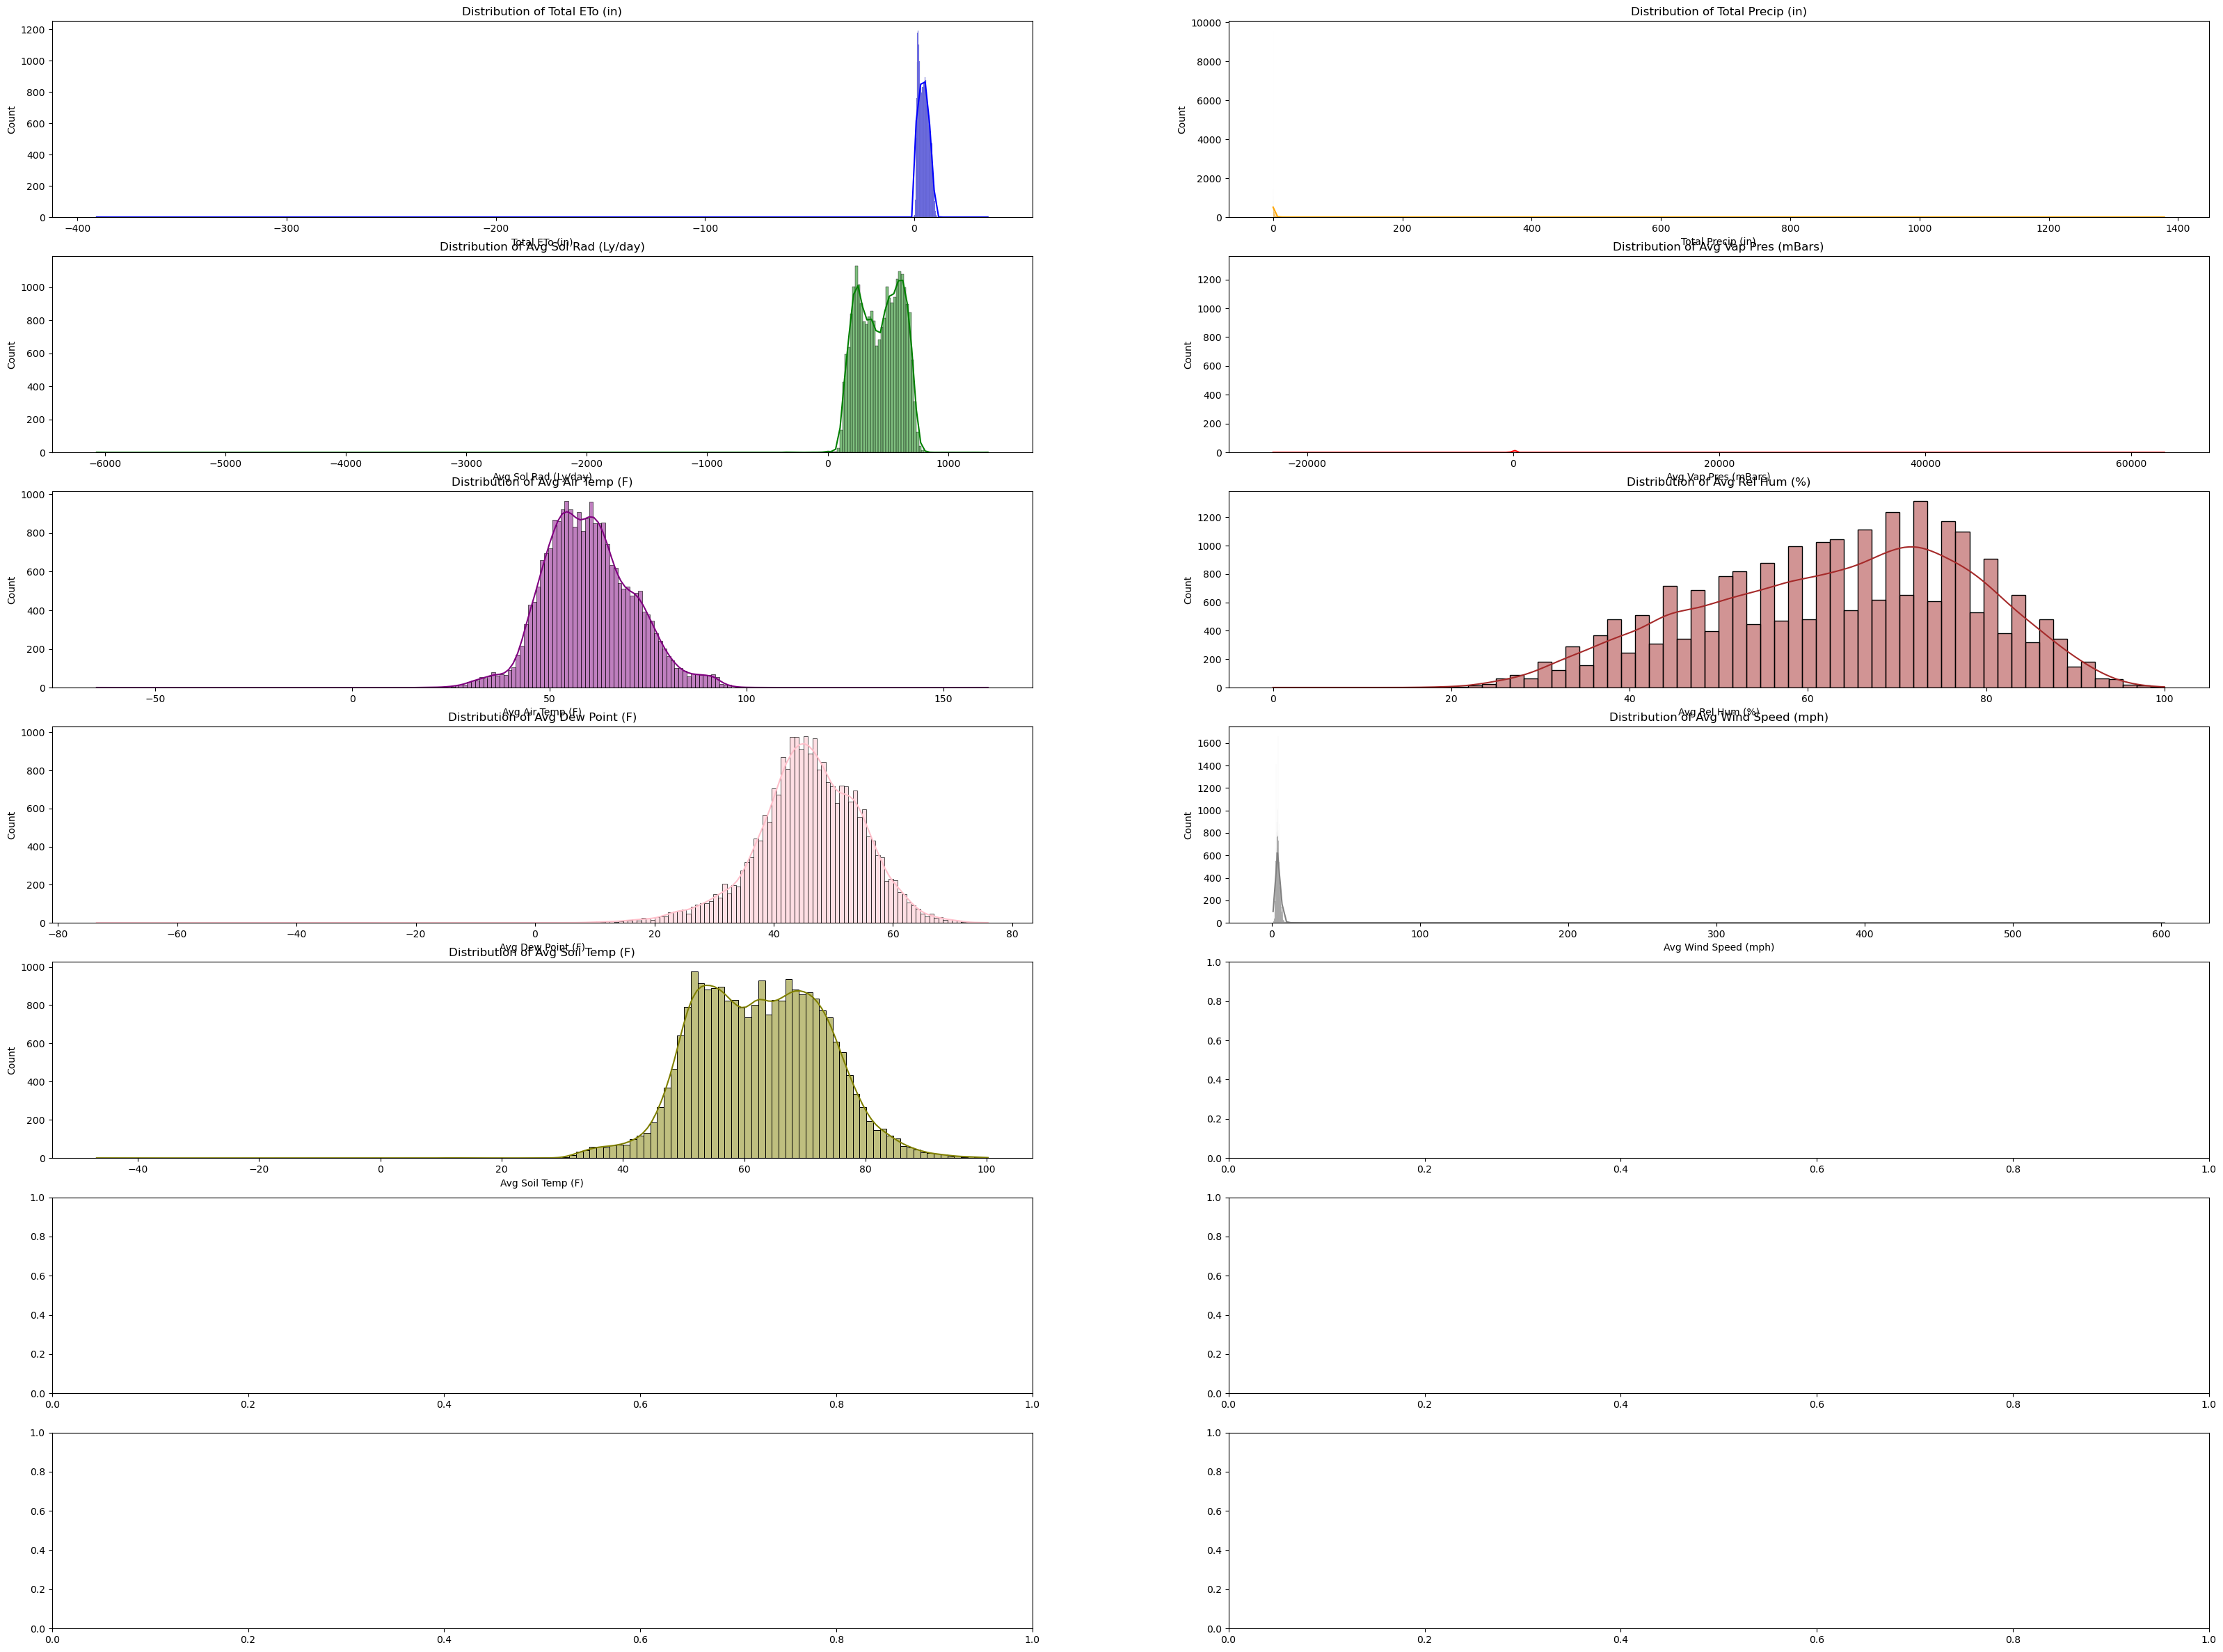

In [17]:
# Data Exploration
fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(40, 30))
colors = ["blue", "orange", "green", "red", "purple", "brown", "pink", "gray", "olive", "cyan", "electric blue", "magenta", "violet"]
for i, var in enumerate(variables):
    sns.histplot(raw_df[var], ax=axes[i//2, i%2], color=colors[i], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {var}')
plt.show()

/Users/MatthewChin/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


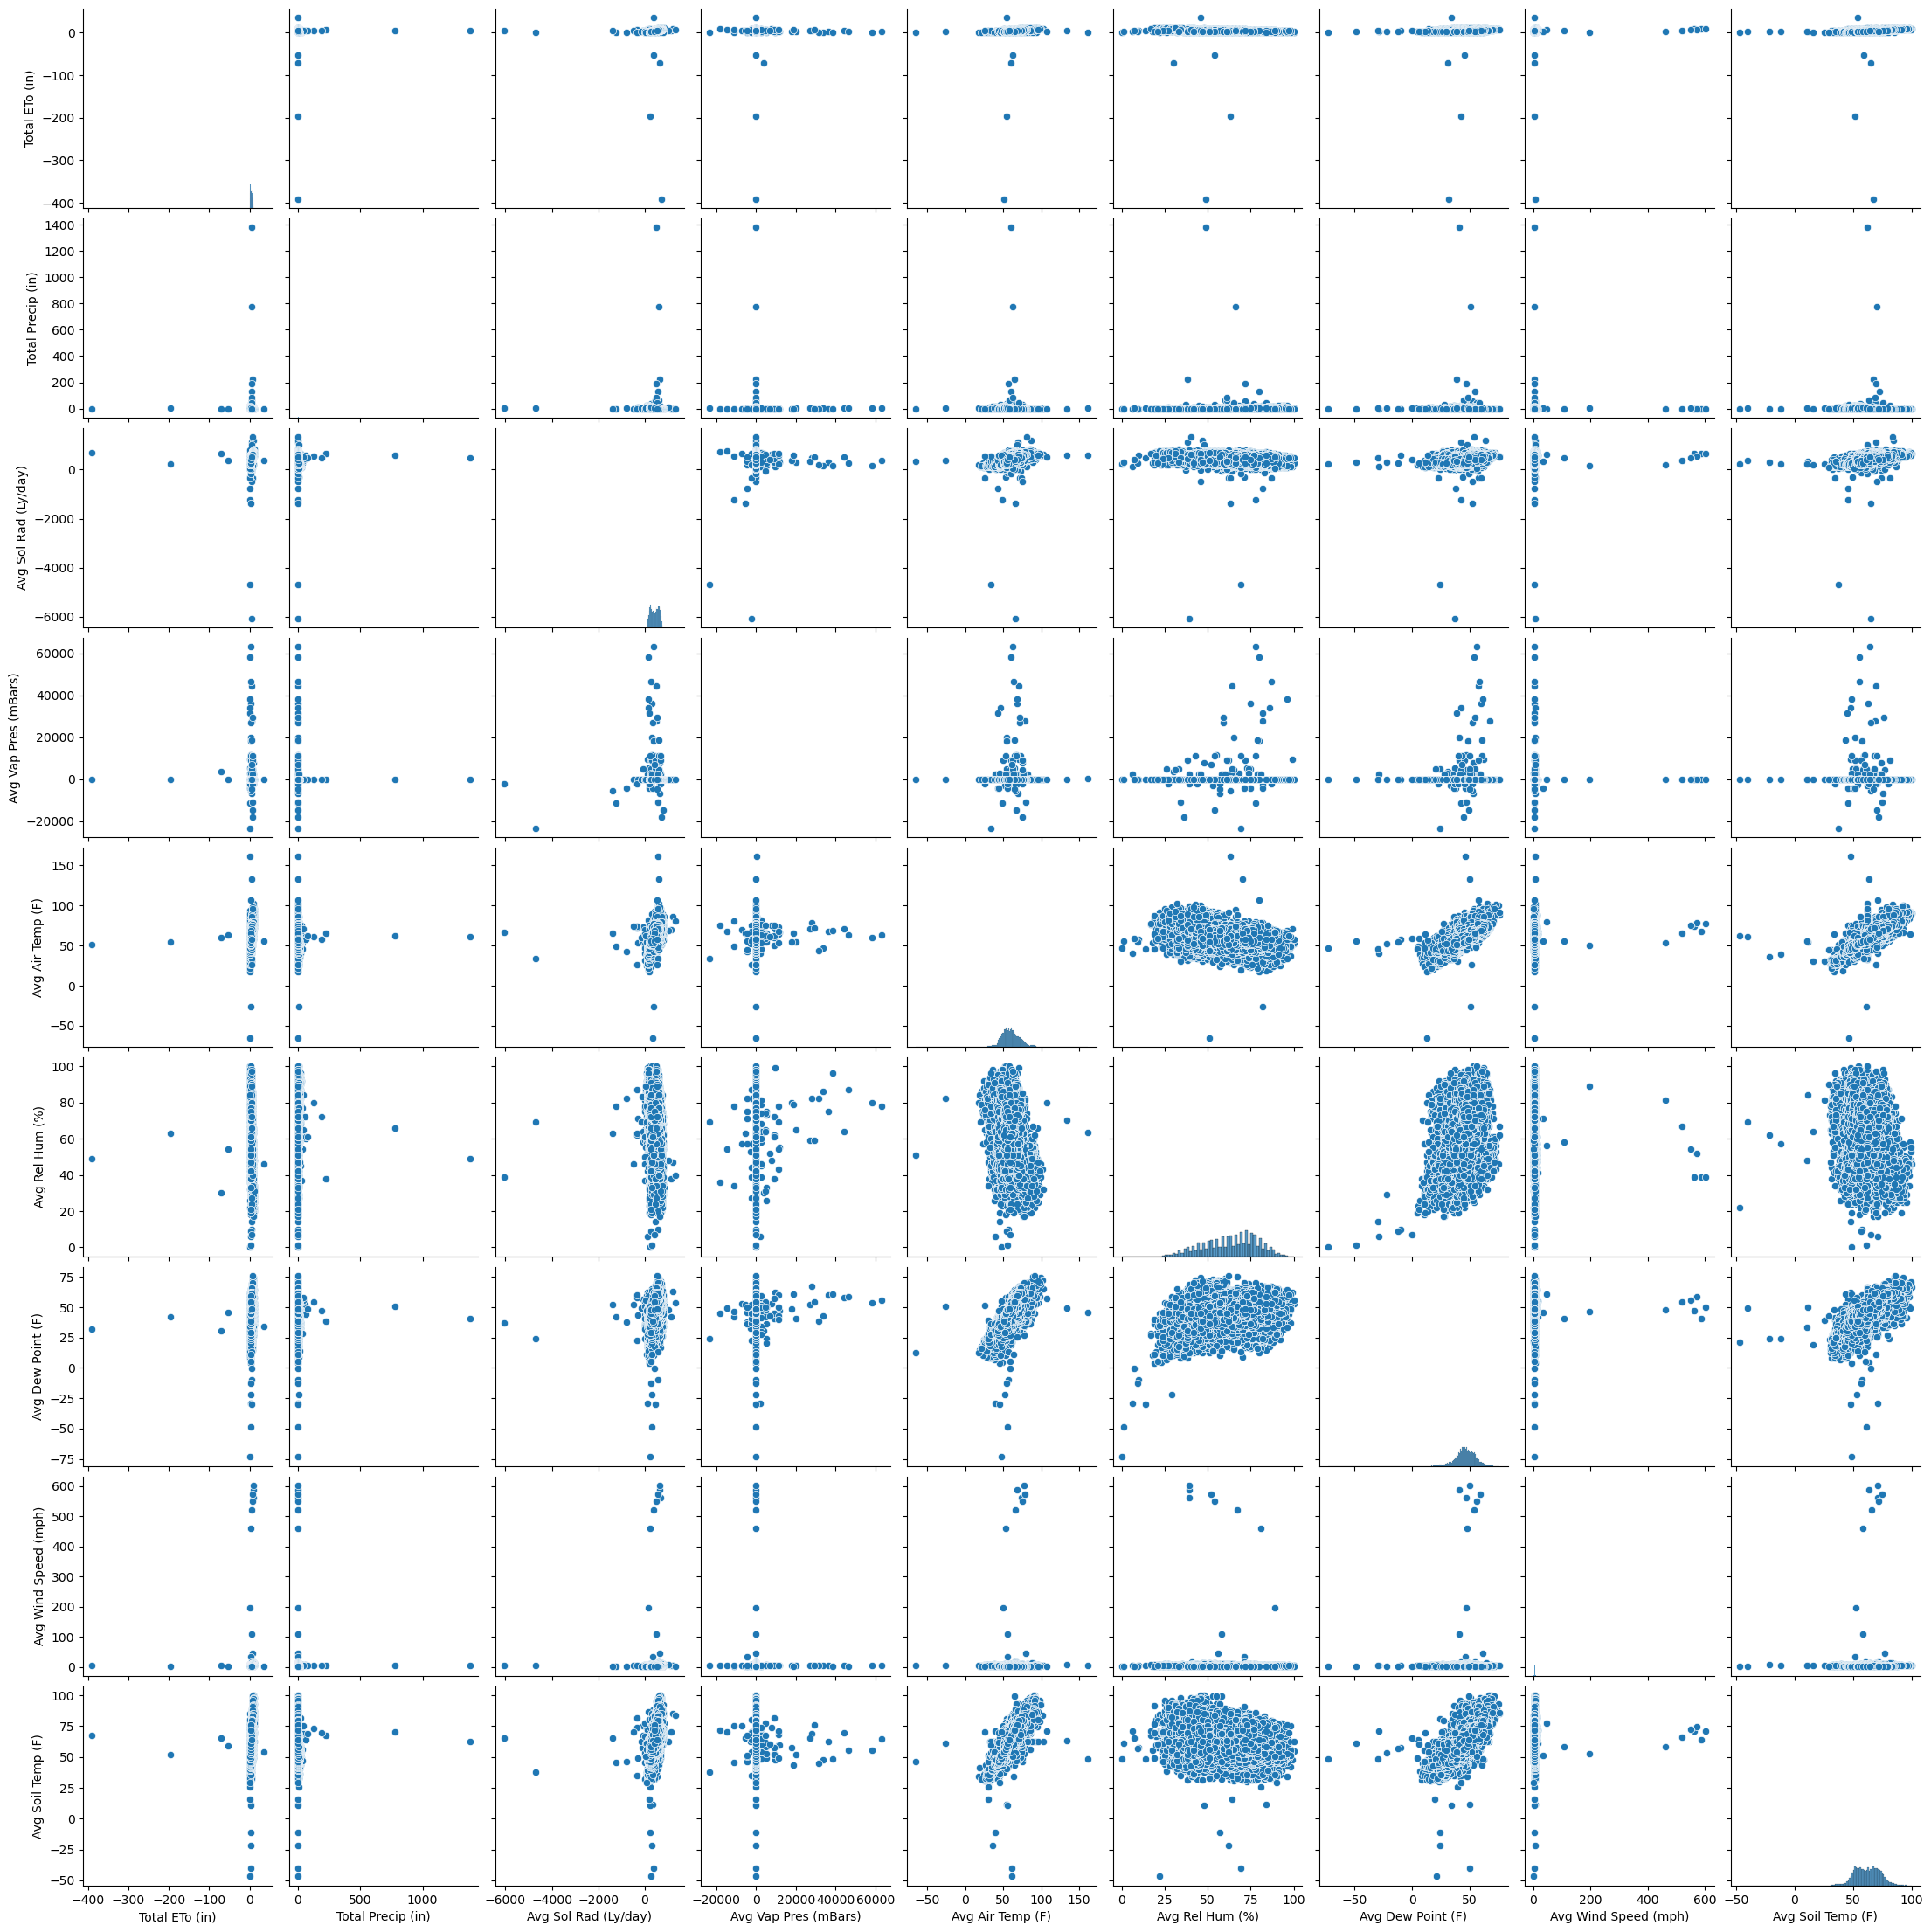

In [18]:
sns.pairplot(raw_df)

## Model Development

In [19]:
# Separate variables
X = df.drop(columns=['Total ETo (in)'])
y = df['Total ETo (in)']

In [20]:
# Prepare training and test data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

In [21]:
# Build model
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

tree_regressor = DecisionTreeRegressor(random_state=50)
tree_regressor.fit(X_train, y_train)

# make predictions on the testing data
y_pred = tree_regressor.predict(X_test)

In [22]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

Mean Squared Error: 29.496827055180177
Mean Absolute Error: 0.3892989864864865
R2: 0.12727385244213985


## Performance Tuning

In [23]:
# Define lists of hyperparameter values to iterate over
splitter = ['best', 'random']
max_features_values = ['sqrt', 'log2', None, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
min_samples_leaf_values = [25, 50, 75, 100, 125, 150, 175, 200, 225, 250]
max_depth_values = [2, 4, 6 , 8, 10, 12, 14, 16]

In [24]:
# Create empty lists for each hyperparameter
results_run1 = []
results_run2 = []
results_run3 = []
results_run4 = []

In [25]:
# Run 1: Varying Split Criteria only
for split_criteria in splitter:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter=split_criteria, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
        # Append results for Run 1
    results_run1.append({
        'Splitter': split_criteria,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R2': r2
    })
df_run1 = pd.DataFrame(results_run1)

In [26]:
df_run1

,Splitter,Mean Squared Error,Mean Absolute Error,R2
0,best,29.496827,0.389299,0.127274
1,random,28.622395,0.411575,0.153146


In [27]:
# Run 2: Max Features
for max_features_value in max_features_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='best', max_features=max_features_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
        # Append results for Run 2
    results_run2.append({
        'Max Features': max_features_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R2': r2
    })
df_run2 = pd.DataFrame(results_run2)

In [28]:
df_run2

,Max Features,Mean Squared Error,Mean Absolute Error,R2
0,sqrt,28.739139,0.496547,0.149692
1,log2,28.739139,0.496547,0.149692
2,None,29.496827,0.389299,0.127274
3,0.3,28.802389,0.457324,0.147820
4,0.4,28.333484,0.407272,0.161694
5,0.5,28.595826,0.403760,0.153932
6,0.6,28.708646,0.388097,0.150594
7,0.7,28.518631,0.387461,0.156216
8,0.8,28.683985,0.384756,0.151323


In [29]:
# Run 3: Min Samples Leaf
for min_samples_leaf_value in min_samples_leaf_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='best', max_features=0.6, min_samples_leaf=min_samples_leaf_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
        # Append results for Run 3
    results_run3.append({
        'Min Samples Leaf': min_samples_leaf_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R2': r2
    })
df_run3 = pd.DataFrame(results_run3)

In [30]:
df_run3

,Min Samples Leaf,Mean Squared Error,Mean Absolute Error,R2
0,25,28.377312,0.380031,0.160397
1,50,28.356386,0.406421,0.161016
2,75,28.328491,0.427269,0.161842
3,100,28.343140,0.459263,0.161408
4,125,28.343790,0.456688,0.161389
5,150,28.375142,0.474637,0.160461
6,175,28.273592,0.476969,0.163466
7,200,28.339588,0.517577,0.161513
8,225,28.362900,0.554560,0.160823
9,250,28.505645,0.634305,0.156600


In [31]:
# Run 4: Max Depth
for max_depth_value in max_depth_values:
    # Initialize and train the Decision Tree Classifier with current hyperparameters
    clf = DecisionTreeRegressor(splitter='best', max_features=0.6, min_samples_leaf=150, max_depth=max_depth_value, random_state=50)
    clf.fit(X_train, y_train)
    
    # Predict on the testing data
    y_pred = clf.predict(X_test)
    
    # Calculate performance metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
        # Append results for Run 4
    results_run4.append({
        'Max Depth': max_depth_value,
        'Mean Squared Error': mse,
        'Mean Absolute Error': mae,
        'R2': r2
    })
df_run4 = pd.DataFrame(results_run4)

In [32]:
df_run4

,Max Depth,Mean Squared Error,Mean Absolute Error,R2
0,2,29.988645,1.234247,0.112722
1,4,28.891233,0.840719,0.145192
2,6,28.552461,0.570009,0.155215
3,8,28.333554,0.486851,0.161692
4,10,28.375142,0.474637,0.160461
5,12,28.375142,0.474637,0.160461
6,14,28.375142,0.474637,0.160461
7,16,28.375142,0.474637,0.160461


In [33]:
# final model
final_clf = DecisionTreeRegressor(splitter='best', max_features=0.6, min_samples_leaf=150, max_depth=10, random_state=50)
final_clf.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, max_features=0.6, min_samples_leaf=150,
                      random_state=50)

In [34]:
# Evaluate final model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

r2 = r2_score(y_test, y_pred)
print("R2:", r2)

Mean Squared Error: 28.37514182582099
Mean Absolute Error: 0.47463674219314816
R2: 0.16046128738759713


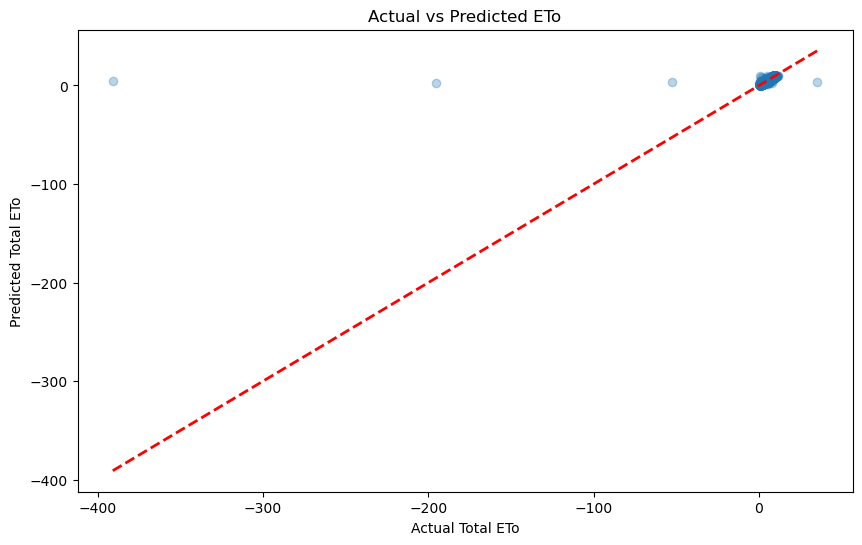

In [35]:
# Visualizing Model Performance
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Total ETo')
plt.ylabel('Predicted Total ETo')
plt.title('Actual vs Predicted ETo')
plt.show()

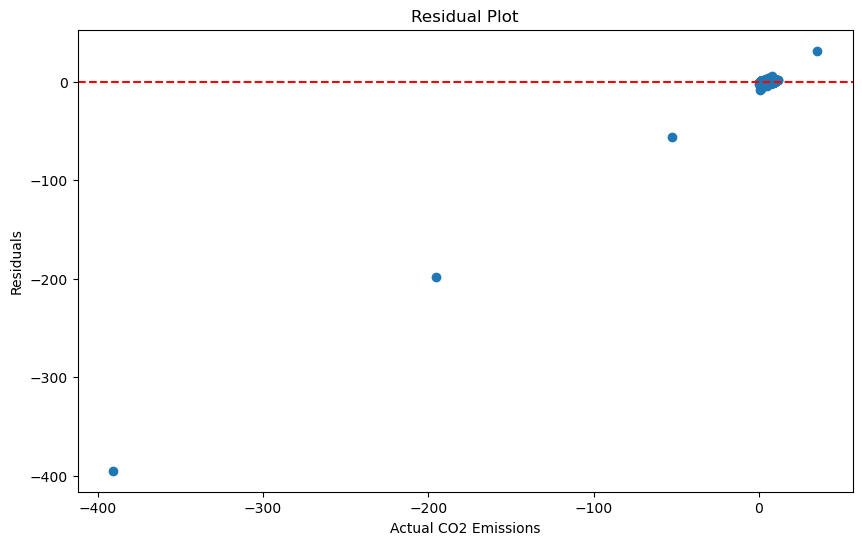

In [36]:
## Model Diagnostics: Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Actual CO2 Emissions')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

In [37]:
# Define the information for the new individual 
new_data = {
    'CIMIS Region': input("Enter CIMIS Region:"),
    'Total Precip (in)': float(input("Enter Precipitation (in):")),
    'Avg Sol Rad (Ly/day)': float(input("Enter Solar Radiation (Ly/day):")),
    'Avg Vap Pres (mBars)': float(input("Enter Vapor Pressure (mBars):")),
    'Avg Air Temp (F)': float(input("Enter Air Temperature (F):")),
    'Avg Rel Hum (%)': float(input("Enter Humidity (%):")),
    'Avg Dew Point (F)': float(input("Enter Dew Point (F):")),
    'Avg Wind Speed (mph)': float(input("Enter Wind Speed (mph):")),
    'Avg Soil Temp (F)': float(input("Enter Soil Temperature (F):"))
}

# Create a DataFrame with the new individual's information
new_df = pd.DataFrame([new_data])

Enter CIMIS Region: Los Angeles Basin
Enter Precipitation (in): .8
Enter Solar Radiation (Ly/day): 582
Enter Vapor Pressure (mBars): 16.2
Enter Air Temperature (F): 70.1
Enter Humidity (%): 65
Enter Dew Point (F): 54.6
Enter Wind Speed (mph): 5.7
Enter Soil Temperature (F): 76.2


In [38]:
# One-hot encode the "CIMIS Region" column
new_df_encoded = pd.get_dummies(new_df['CIMIS Region'], prefix='CIMIS Region')
new_df_encoded

# Ensure all columns are present in the encoded DataFrame
missing_cols = set(oh_encoder.get_feature_names_out(['CIMIS Region'])) - set(new_df_encoded.columns)
for col in missing_cols:
    new_df_encoded[col] = 0

# Reorder columns to match the original encoding
new_df_encoded = new_df_encoded[oh_encoder.get_feature_names_out(['CIMIS Region'])]

# Final DataFrame
final_df = new_df.drop(columns=['CIMIS Region']).join(new_df_encoded)
final_df

,Total Precip (in),Avg Sol Rad (Ly/day),Avg Vap Pres (mBars),Avg Air Temp (F),Avg Rel Hum (%),Avg Dew Point (F),Avg Wind Speed (mph),Avg Soil Temp (F),CIMIS Region_Bishop,CIMIS Region_Central Coast Valleys,...,CIMIS Region_Los Angeles Basin,CIMIS Region_Monterey Bay,CIMIS Region_North Coast Valleys,CIMIS Region_Northeast Plateau,CIMIS Region_Sacramento Valley,CIMIS Region_San Bernardino,CIMIS Region_San Francisco Bay,CIMIS Region_San Joaquin Valley,CIMIS Region_Sierra Foothill,CIMIS Region_South Coast Valleys
0,0.8,582.0,16.2,70.1,65.0,54.6,5.7,76.2,0,0,...,True,0,0,0,0,0,0,0,0,0


In [39]:
# Use the trained model to make predictions
prediction = final_clf.predict(final_df)

# Print the predicted income category
print("Predicted Total ETo (in): ", prediction[0])

Predicted Total ETo (in):  6.341927272727276
